In [1]:
%matplotlib inline
from epoch_scripts.fields_calc import *
from epoch_scripts.hot_elec_calc import *

In [2]:
dirs = []
for i in range(1, 11):
    for j in range(1, 21):
        dirs.append(f'Data_500_{i}/Data_{j}')

dirs = np.array(dirs).reshape(10, 20)

print(dirs)

[['Data_500_1/Data_1' 'Data_500_1/Data_2' 'Data_500_1/Data_3'
  'Data_500_1/Data_4' 'Data_500_1/Data_5' 'Data_500_1/Data_6'
  'Data_500_1/Data_7' 'Data_500_1/Data_8' 'Data_500_1/Data_9'
  'Data_500_1/Data_10' 'Data_500_1/Data_11' 'Data_500_1/Data_12'
  'Data_500_1/Data_13' 'Data_500_1/Data_14' 'Data_500_1/Data_15'
  'Data_500_1/Data_16' 'Data_500_1/Data_17' 'Data_500_1/Data_18'
  'Data_500_1/Data_19' 'Data_500_1/Data_20']
 ['Data_500_2/Data_1' 'Data_500_2/Data_2' 'Data_500_2/Data_3'
  'Data_500_2/Data_4' 'Data_500_2/Data_5' 'Data_500_2/Data_6'
  'Data_500_2/Data_7' 'Data_500_2/Data_8' 'Data_500_2/Data_9'
  'Data_500_2/Data_10' 'Data_500_2/Data_11' 'Data_500_2/Data_12'
  'Data_500_2/Data_13' 'Data_500_2/Data_14' 'Data_500_2/Data_15'
  'Data_500_2/Data_16' 'Data_500_2/Data_17' 'Data_500_2/Data_18'
  'Data_500_2/Data_19' 'Data_500_2/Data_20']
 ['Data_500_3/Data_1' 'Data_500_3/Data_2' 'Data_500_3/Data_3'
  'Data_500_3/Data_4' 'Data_500_3/Data_5' 'Data_500_3/Data_6'
  'Data_500_3/Data_7' 'D

In [3]:
I_SJ_2048 = []
SRS_SJ_2048 = []

with open('SJ_2048.csv', 'r') as file:
    reader = csv.reader(file)
    for row in reader:
        I_SJ_2048.append(float(row[0]))
        SRS_SJ_2048.append(float(row[1]))
        

In [4]:
n,m = dirs.shape
I_SRS_data = np.zeros((n, m))
I_L_data = np.zeros((n, m))

fname_srs = 'Ensemble_SRS_test_2048.npy'
fname_I = 'Ensemble_I_test_2048.npy'
    

for i in range(n):
    for j in range(m):
        print(dirs[i,j])
        epoch_data = Laser_Plasma_Params(dir = dirs[i,j])
        I_L_data[i,j] = epoch_data.intensity
        epoch_fields = EM_fields(dir = dirs[i,j])
        I_SRS_data[i,j] = epoch_fields.get_flux_grid_av(ncells = 10, signal = 'bsrs')

np.save(fname_srs, I_SRS_data)
np.save(fname_I, I_L_data)

Data_500_1/Data_1
Data_500_1/Data_2
Data_500_1/Data_3
Data_500_1/Data_4
Data_500_1/Data_5
Data_500_1/Data_6
Data_500_1/Data_7
Data_500_1/Data_8
Data_500_1/Data_9
Data_500_1/Data_10
Data_500_1/Data_11
Data_500_1/Data_12
Data_500_1/Data_13
Data_500_1/Data_14
Data_500_1/Data_15
Data_500_1/Data_16
Data_500_1/Data_17
Data_500_1/Data_18
Data_500_1/Data_19
Data_500_1/Data_20
Data_500_2/Data_1
Data_500_2/Data_2
Data_500_2/Data_3
Data_500_2/Data_4
Data_500_2/Data_5
Data_500_2/Data_6
Data_500_2/Data_7
Data_500_2/Data_8
Data_500_2/Data_9
Data_500_2/Data_10
Data_500_2/Data_11
Data_500_2/Data_12
Data_500_2/Data_13
Data_500_2/Data_14
Data_500_2/Data_15
Data_500_2/Data_16
Data_500_2/Data_17
Data_500_2/Data_18
Data_500_2/Data_19
Data_500_2/Data_20
Data_500_3/Data_1
Data_500_3/Data_2
Data_500_3/Data_3
Data_500_3/Data_4
Data_500_3/Data_5
Data_500_3/Data_6
Data_500_3/Data_7
Data_500_3/Data_8
Data_500_3/Data_9
Data_500_3/Data_10
Data_500_3/Data_11
Data_500_3/Data_12
Data_500_3/Data_13
Data_500_3/Data_14
D

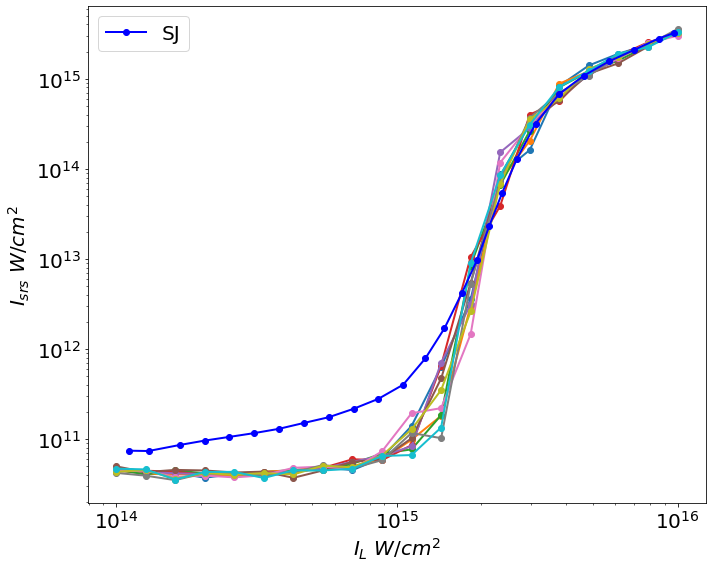

In [5]:
for i in range(n):   
    plt.loglog(I_L_data[i], I_SRS_data[i], '-o')
plt.plot(I_SJ_2048, SRS_SJ_2048, '-o', color = 'blue', label = 'SJ')
plt.xlabel(r'$I_{L}  \,\, W/cm^2$')
plt.ylabel(r'$I_{srs} \,\, W/cm^2$')
plt.gcf().set_size_inches(10,8)
plt.legend()

In [6]:
I_SRS_av = np.zeros(m)
I_L_av = np.zeros(m)

for i in range(n):
    I_SRS_av += I_SRS_data[i]
    I_L_av += I_L_data[i]

I_SRS_av /= 10
I_L_av /= 10

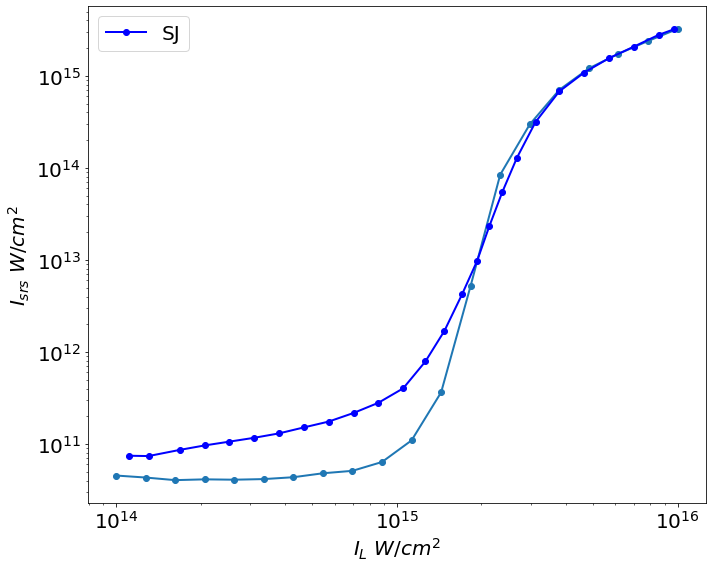

In [7]:
plt.loglog(I_L_av, I_SRS_av, '-o')
plt.plot(I_SJ_2048, SRS_SJ_2048, '-o', color = 'blue', label = 'SJ')
plt.xlabel(r'$I_{L}  \,\, W/cm^2$')
plt.ylabel(r'$I_{srs} \,\, W/cm^2$')
plt.gcf().set_size_inches(10,8)
plt.legend()